
## FASHION MNIST CNN ANALYSIS
 
* Label Description 
* 0 T-shirt/top 
* 1 Trouser 
* 2 Pullover 
* 3 Dress 
* 4 Coat 
* 5 Sandal 
* 6 Shirt 
* 7 Sneaker 
* 8 Bag 
* 9 Ankle boot

### Each gray-scale image is 28x28
* Each image is of 28x28 Matrix
* Each image is gray - scale
* 2 Dimentional Marixes of image


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Load the fashion-mnist pre-shuffled train data and test data

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
print(x_test.shape)

(10000, 28, 28)


In [5]:
#print(x_train)
#print(y_train)
#data set is big so i am commenting these lines, you can try uncommenting and see the dataset

In [6]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

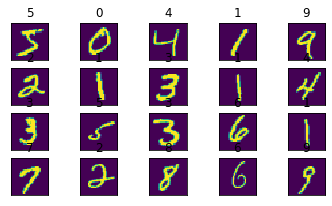

In [7]:
for i in range(0,20):
    # 5 Row & 5 Column
    # Plt.subplot split one plot into small plots 
    plt.subplot(5,5, i+1)
    #imshow()is used to display images. it is used with plt.subplot()
    # input x_train 28X28 image of 2D
    plt.imshow(x_train[i] )
    plt.title((y_train[i]))
    plt.xticks([])
    plt.yticks([])


Define the text_labels

In [8]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

In [9]:
# Image index, you can pick any number between 0 and 59,999
img_index = 70

In [10]:
# y_train contains the lables, ranging from 0 to 9
# y_train[0]

label_index = y_train[img_index]

Print the label, to see what happens

In [11]:
print("y= "+ str(label_index)+" "+(fashion_mnist_labels[label_index]))

y= 1 Trouser


Lets pull out one image from dataset

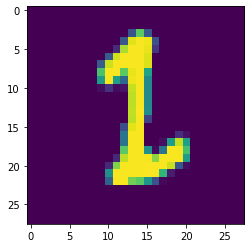

In [12]:
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale. 0-255

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
#we are using astype because we have image data and to normalise we need numerical data

### Split the data into train and validation

In [14]:
(x_train, x_valid) = x_train[5000:],x_train[:5000]
(y_train, y_valid) = y_train[5000:],y_train[:5000]

## Preprocessing

##### Reshape input data from (28, 28) array to (28, 28, 1) matrix, reshape() is to reshape array or matrix new , reshape data will be 784x1


In [15]:
w,h = 28,28
x_train = x_train.reshape(x_train.shape[0],w,h,1)
x_valid = x_valid.reshape(x_valid.shape[0],w,h,1)
x_test = x_test.reshape(x_test.shape[0],w,h,1)
print(x_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

#### One-hot encode the labels ,
## One Hot Encoding –
#### It refers to splitting the column which contains numerical categorical data to many columns depending on the number of categories present in that column. Each column contains “0” or “1” corresponding to which column it has been placed.

In [16]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_test.shape


(10000, 10)

In [17]:
# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)


In [18]:
# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

55000 train set
5000 validation set
10000 test set


## Build Model
We will use sequential model.

In [19]:
model = tf.keras.Sequential()

#### Convolution Neural Network - Filter - 8x8 = 64(Matrix Shape) ,
#### Kernal - Stride = 2 , 
#### activation - ReLU, 
#### Padding - Drop the not selected matrix
#### Must define the input shape in the first layer of the neural network 

In [20]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, 
                                 padding='same', 
                                 activation='relu', 
                                 input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3)) #Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, 
                                 padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
# Flatten the pixel matrix into feature matrix
model.add(tf.keras.layers.Flatten())

In [22]:
#add hidden layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

In [23]:
#Output Layer (Class/Category) - 10
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [24]:
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Fit the Model (practically training the model by running first time)


In [27]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 889s 16ms/sample - loss: 0.1781 - acc: 0.9457 - val_loss: 0.0708 - val_acc: 0.9780


In [28]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 62s 6ms/sample - loss: 0.0690 - acc: 0.9788


### Print test accuracy


In [31]:
print('\n', 'Test accuracy:', score[1])
y_hat = model.predict(x_test)



 Test accuracy: 0.9788


### Plot a random sample of 10 test images, their predicted labels and ground truth

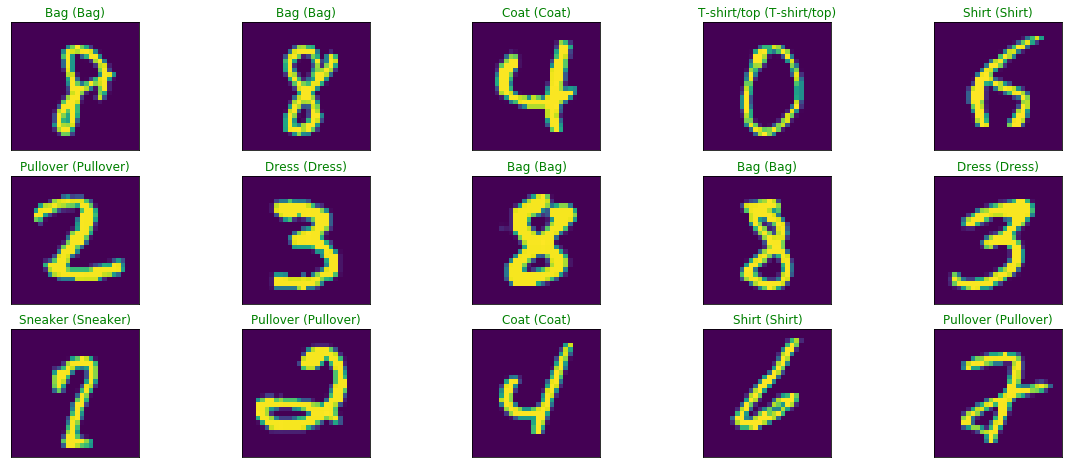

In [32]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], 
                                        size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i+ 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
